# Preprocessing:

correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [10]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("dataset.csv")

# Check for missing values
values_null = data.isnull().sum()
print("Null values before preprocessing:")
print(values_null)

# Drop rows with any missing values
data.dropna(inplace=True)

# Check for missing values again (after dropping)
value_drop = data.isnull().sum()
print("\nMissing values after dropping rows with missing values:")
print(value_drop)

# Replace incorrect height data with random numbers between 150 and 180
data['height'] = np.random.randint(150, 181, size=len(data))

# Display the first few rows to ensure correctness
print(data.head())

Null values before preprocessing:
Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

Missing values after dropping rows with missing values:
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
6  Jordan Mickey  Boston Celtics      55       PF   21  06-Aug     235   
7   Kelly Olynyk  Boston Celtics      41        C   25     7-0     238   

         College     Salary  height  
0          Texas  7730337.0     164  
1      Marquette  6796117.0     160  
3  Georgia State  1148640.0     159  
6            LSU  1170960

# Analysis Tasks:

## 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

                        Employees  Percentage
New Orleans Pelicans           16    4.383562
Portland Trail Blazers         15    4.109589
Detroit Pistons                15    4.109589
Milwaukee Bucks                14    3.835616
Philadelphia 76ers             14    3.835616
Oklahoma City Thunder          14    3.835616
Los Angeles Clippers           14    3.835616
Washington Wizards             13    3.561644
Charlotte Hornets              13    3.561644
Phoenix Suns                   13    3.561644
Sacramento Kings               13    3.561644
Memphis Grizzlies              13    3.561644
Brooklyn Nets                  13    3.561644
Boston Celtics                 12    3.287671
Dallas Mavericks               12    3.287671
Indiana Pacers                 12    3.287671
Chicago Bulls                  12    3.287671
Los Angeles Lakers             12    3.287671
Golden State Warriors          12    3.287671
Houston Rockets                11    3.013699
Cleveland Cavaliers            11 

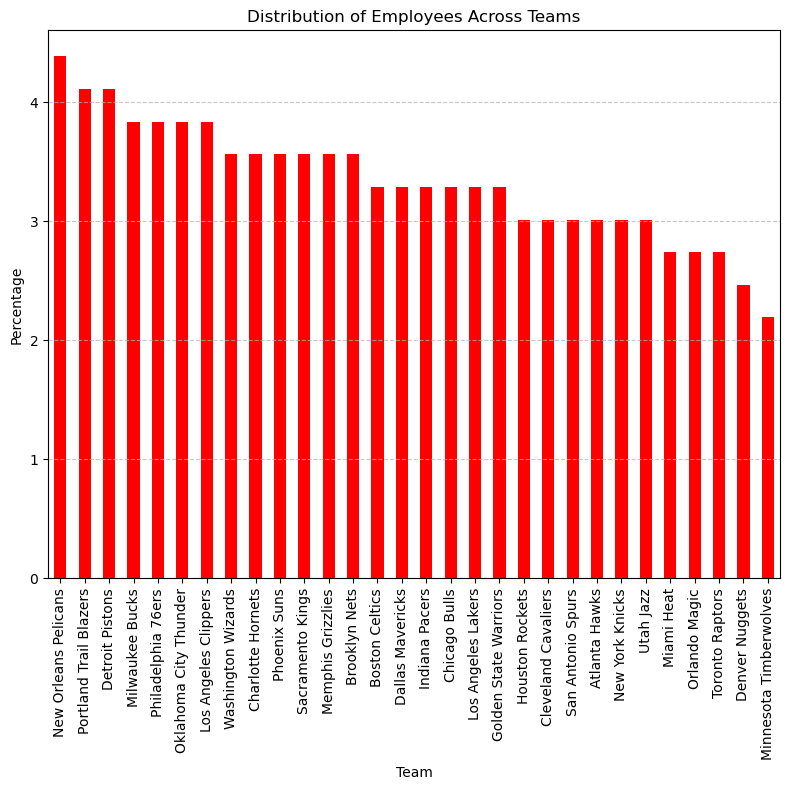

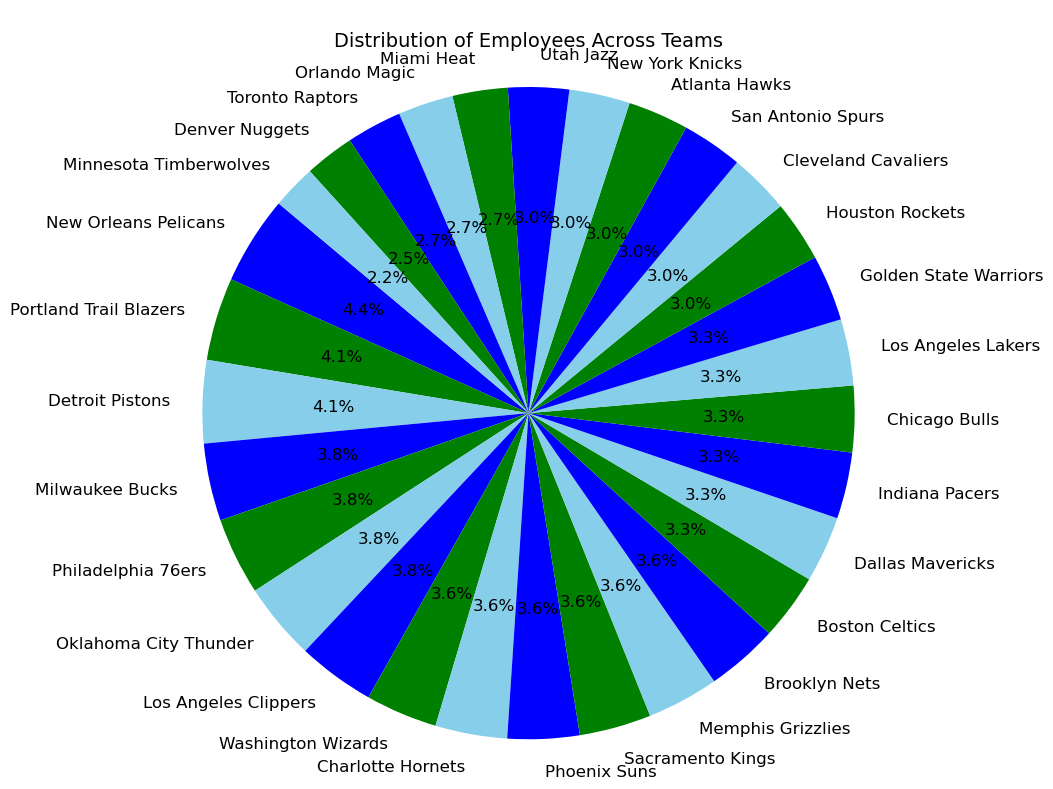

In [74]:
import matplotlib.pyplot as plt

# Calculate the distribution of employees across each team
team_distribution = data['Team'].value_counts()

# Calculate the total number of employees
total_employees = len(data)

# Calculate the percentage split for each team
percentage_split = (team_distribution / total_employees) * 100

# Create a DataFrame with the distribution data
distribution_df = pd.DataFrame({
    'Employees': team_distribution,
    'Percentage': percentage_split
})

# Print the DataFrame
print(distribution_df)


# Plotting
plt.figure(figsize=(8, 8))
percentage_split.plot(kind='bar', color='Red')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting the pie chart with improved layout
plt.figure(figsize=(10, 8))
plt.title('\nDistribution of Employees Across Teams', fontsize=14)
plt.pie(percentage_split, labels=percentage_split.index,  autopct='%1.1f%%',startangle=140, colors=['blue', 'green', 'skyblue'], textprops={'fontsize': 12})
plt.axis('equal')
plt.tight_layout()
plt.show()


## 2.Segregate employees based on their positions within the company

Segregation of Employees Based on Positions:
SG    87
PF    81
PG    76
SF    71
C     50
Name: Position, dtype: int64


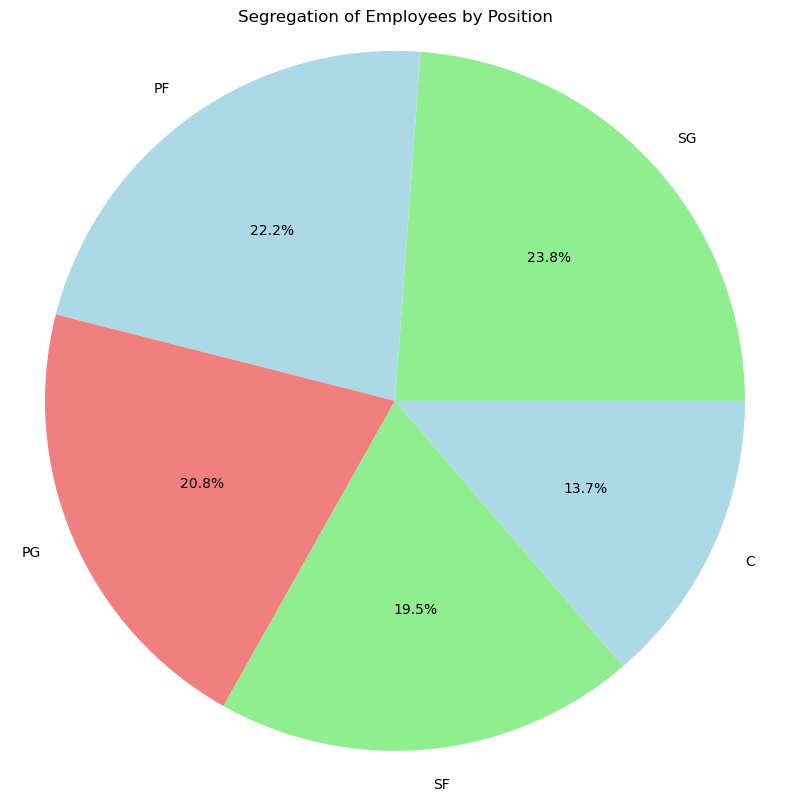

In [73]:
# Group the data by "position" and count the number of employees in each position
position= data['Position'].value_counts()

# Print the distribution of employees based on positions
print("Segregation of Employees Based on Positions:")
print(position)
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(position, labels=position_distribution.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Segregation of Employees by Position')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 3. Identify the predominant age group among employees.


Predominant Age Group Among Employees: 20-29


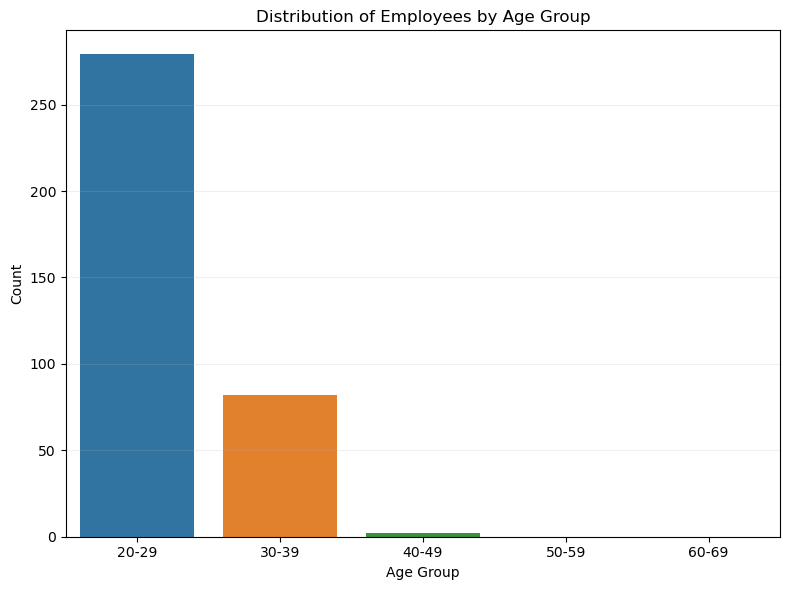

In [72]:
import seaborn as sns


# Define age  and age list
age = [20, 30, 40, 50, 60, 70]
agelist = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column for age group
data['agelist'] = pd.cut(data['Age'], bins=age, labels=agelist, right=False)


# Determine the predominant age group
age_group = data['agelist'].mode().iloc[0]

# Print the predominant age group
print("\nPredominant Age Group Among Employees:", age_group)

# Plot the count of employees in each age group
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='agelist')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()




# 4. Discover which team and position have the highest salary expenditure.


Team with the Highest Salary Expenditure: Los Angeles Clippers


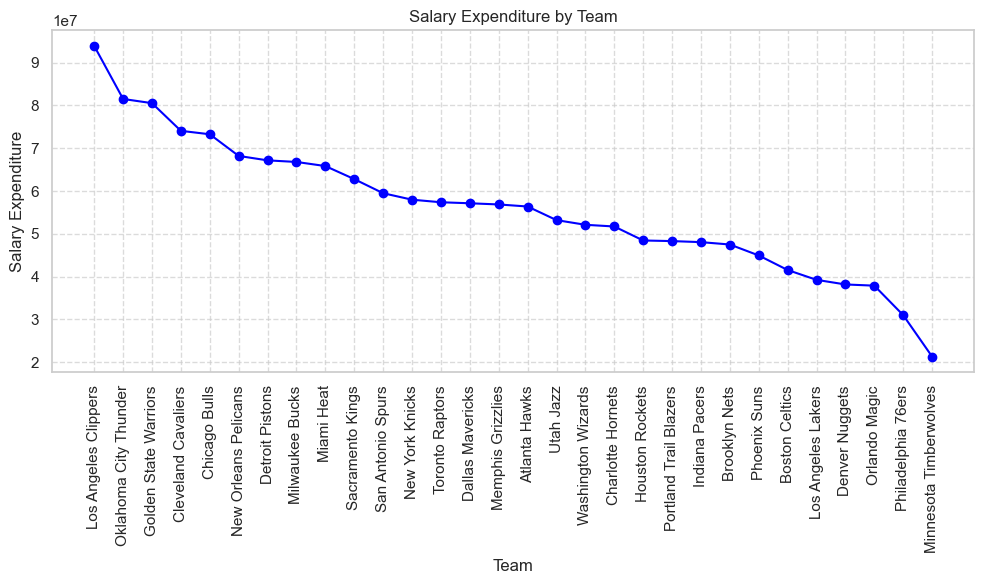

In [92]:
# Group the data by "Team" and calculate the total salary expenditure for each team
team_salary = data.groupby('Team')['Salary'].sum()


# Find the team with the highest salary expenditure
highest_salary_team = team_salary_sorted.index[0]
print("\nTeam with the Highest Salary Expenditure:", highest_salary_team)


# Sort the groups in descending order based on salary expenditure
team_salary_sorted = team_salary.sort_values(ascending=False)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(team_salary_sorted.index, team_salary_sorted.values, color='blue', marker='o', linestyle='-')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# 5.Investigate if there's any correlation between age and salary


Correlation Coefficient between Age and Salary: 0.15999189342806175


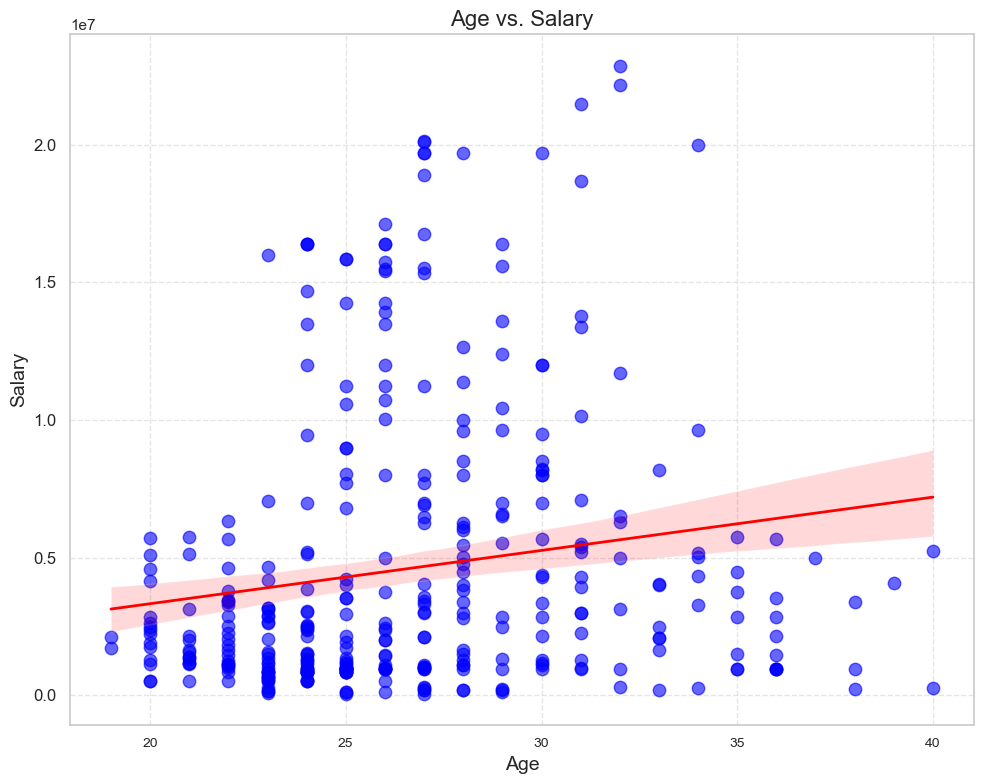

In [88]:
import seaborn as sns


# Calculate the correlation coefficient
correlation_coefficient = data['Age'].corr(data['Salary'])

print("\nCorrelation Coefficient between Age and Salary:", correlation_coefficient)


# Set seaborn style
sns.set(style="whitegrid")

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x='Age', y='Salary', data=data, scatter_kws={'color': 'blue', 'alpha': 0.6, 's': 80}, line_kws={'color': 'red', 'lw': 2})
plt.title('Age vs. Salary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
